In [53]:
import tensorflow as tf
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [54]:
# Extract the archive
zip_ref = zipfile.ZipFile('./Date_Fruit_Image_Dataset_Splitted_Train.zip', 'r')
zip_ref.extractall('tmp/Date_Fruit')

zip_ref = zipfile.ZipFile('./Date_Fruit_Image_Dataset_Splitted_Test.zip', 'r')
zip_ref.extractall('tmp/Date_Fruit')

zip_ref.close()

In [98]:
# Build the model and complie it
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(250, 250, 3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
              metrics=['accuracy'])
model.summary()

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)              │ (None, 250, 250, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 125, 125, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │     7,872,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,897,385 (30.13 MB)

 Trainable params: 7,897,385 (30.13 MB)

 Non-trainable params: 0 (0.00 B)

In [100]:
# Image data generators + data augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    vertical_flip=True,
    brightness_range=[0.8, 1],
    validation_split=0.2
    )

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'tmp/Date_Fruit/train/',
    target_size=(250,250),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    'tmp/Date_Fruit/train/',
    target_size=(250,250),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 930 images belonging to 9 classes.
Found 226 images belonging to 9 classes.


In [101]:
# History
epochs = 20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
)

Epoch 1/20


/opt/homebrew/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 674ms/step - accuracy: 0.1565 - loss: 6.1884 - val_accuracy: 0.3496 - val_loss: 1.9832
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 676ms/step - accuracy: 0.3432 - loss: 1.9096 - val_accuracy: 0.5044 - val_loss: 1.3559
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 661ms/step - accuracy: 0.4878 - loss: 1.5838 - val_accuracy: 0.6593 - val_loss: 0.8963
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 723ms/step - accuracy: 0.6148 - loss: 1.0310 - val_accuracy: 0.7168 - val_loss: 0.8049
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 654ms/step - accuracy: 0.6658 - loss: 0.9860 - val_accuracy: 0.6637 - val_loss: 0.9530
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 685ms/step - accuracy: 0.7222 - loss: 0.8479 - val_accuracy: 0.5841 - val_loss: 1.1131
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 690ms/step - accuracy: 0.7553 - loss: 0.7050 - val_accuracy: 0.7345 - val_loss: 0.7853
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 670ms/step - accuracy: 0.7343 - loss: 0.8260 - val_accuracy: 0.738

In [102]:
# test ImageDataGenerator

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'tmp/Date_Fruit/test/',
    target_size=(250, 250),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 502 images belonging to 9 classes.


In [114]:
# calculate the test loss and accuracy

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - accuracy: 0.9077 - loss: 0.3079
Test Loss: 0.41011178493499756
Test Accuracy: 0.8725099563598633


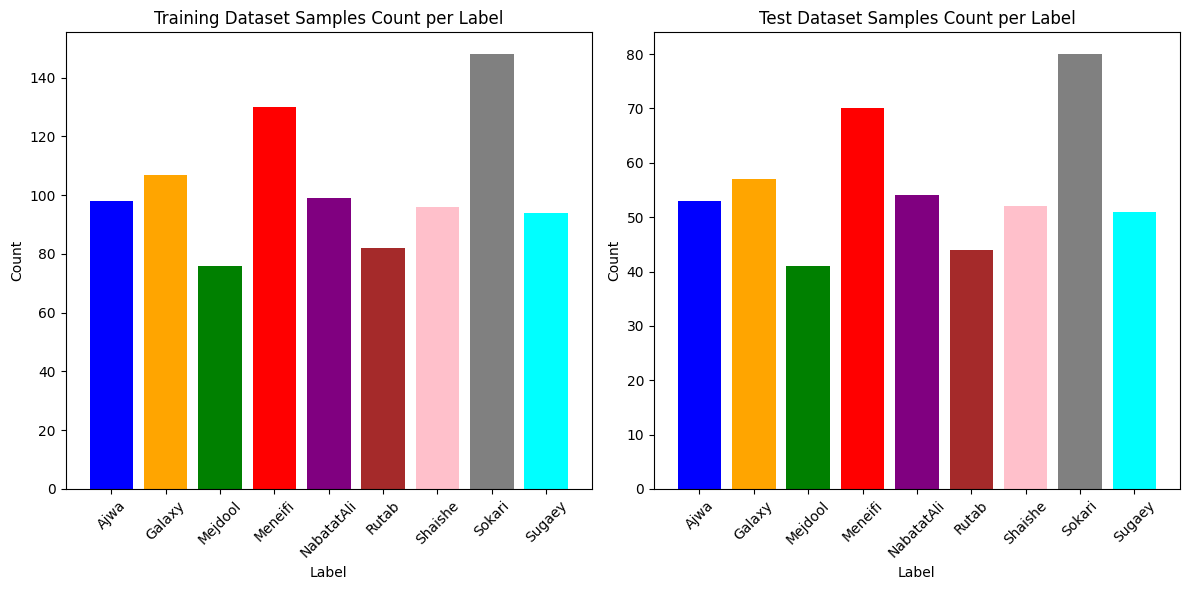

In [104]:
# test plots 1
import numpy as np
import matplotlib.pyplot as plt

class_names = ['Ajwa', 'Galaxy', 'Mejdool', 'Meneifi', 'NabatatAli', 'Rutab', 'Shaishe', 'Sokari', 'Sugaey']
train_counts = np.unique(train_generator.labels, return_counts=True)[1]
test_counts = np.unique(test_generator.labels, return_counts=True)[1]

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(len(train_counts)), train_counts, color=colors)
plt.title('Training Dataset Samples Count per Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.subplot(1, 2, 2)
plt.bar(range(len(test_counts)), test_counts, color=colors)
plt.title('Test Dataset Samples Count per Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.tight_layout()
plt.show()

In [105]:
# test plots 2
from sklearn.metrics import classification_report
import seaborn as sns

true_labels = test_generator.labels
predicted_labels = np.argmax(model.predict(test_generator), axis=1)

print('Classification Report:')
print(classification_report(true_labels, predicted_labels, target_names=class_names))

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 257ms/step
Classification Report:
              precision    recall  f1-score   support

        Ajwa       0.93      1.00      0.96        53
      Galaxy       0.78      0.91      0.84        57
     Mejdool       0.95      0.90      0.93        41
     Meneifi       0.76      0.87      0.81        70
  NabatatAli       0.89      0.76      0.82        54
       Rutab       1.00      0.80      0.89        44
     Shaishe       0.96      0.90      0.93        52
      Sokari       0.94      0.81      0.87        80
      Sugaey       0.78      0.92      0.85        51

    accuracy                           0.87       502
   macro avg       0.89      0.88      0.88       502
weighted avg       0.88      0.87      0.87       502



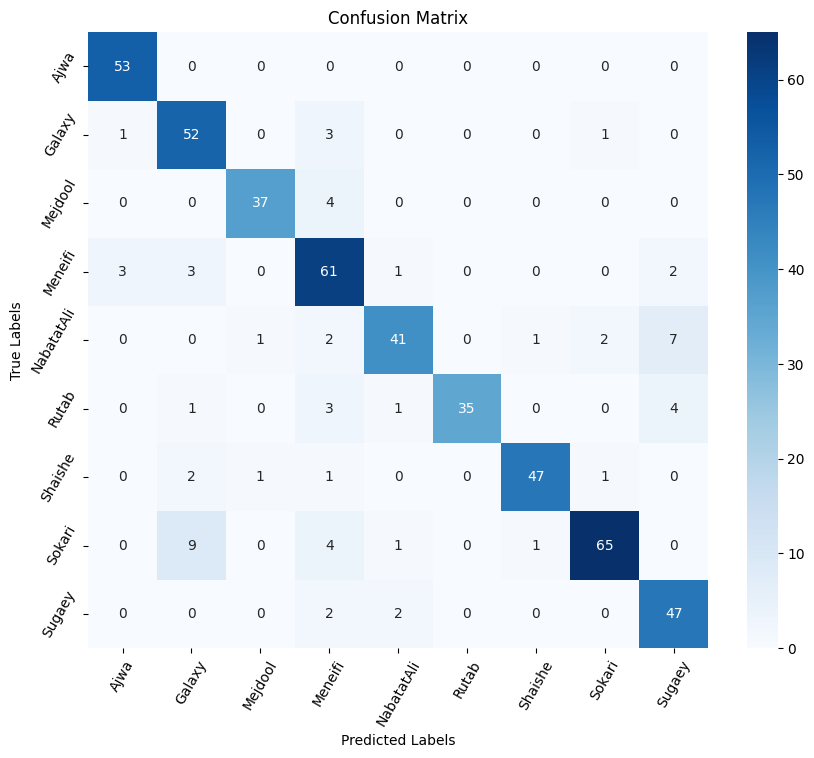

In [106]:
# test plot 3
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()

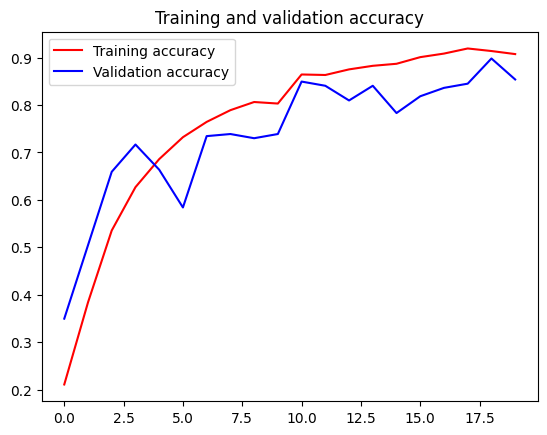

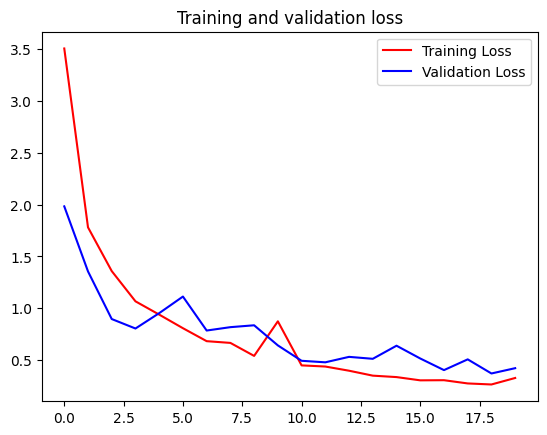

In [113]:
# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()